In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

temperatures = pd.read_csv('E:/DQLab/Dataset/Datacamp/temperatures.csv', sep=',')
print(temperatures.head())

   index        date     city        country  avg_temp_c
0      0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [2]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16500 non-null  int64  
 1   date        16500 non-null  object 
 2   city        16500 non-null  object 
 3   country     16500 non-null  object 
 4   avg_temp_c  16407 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 644.7+ KB


In [3]:
# Drop index column
temperatures = temperatures.drop('index', axis=1)

In [4]:
# Convert date column to datetime
temperatures['date'] = pd.to_datetime(temperatures['date'])
print(temperatures.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        16500 non-null  datetime64[ns]
 1   city        16500 non-null  object        
 2   country     16500 non-null  object        
 3   avg_temp_c  16407 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 515.8+ KB
None


In [5]:
# Print ountcount missing value each column
print(temperatures.isna().sum())

date           0
city           0
country        0
avg_temp_c    93
dtype: int64


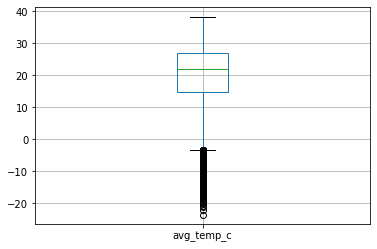

In [6]:
temperatures.boxplot('avg_temp_c')
plt.show()

In [7]:
temperatures['avg_temp_c'] = temperatures['avg_temp_c'].fillna(temperatures['avg_temp_c'].median())

In [8]:
# Print ountcount missing value each column
print(temperatures.isna().sum())

date          0
city          0
country       0
avg_temp_c    0
dtype: int64


In [9]:
# Print minimal and maximal date
print(temperatures['date'].max())
print(temperatures['date'].min())

2013-09-01 00:00:00
2000-01-01 00:00:00


In [10]:
# Create unique values for country
print(temperatures['country'].unique())

["Côte D'Ivoire" 'Ethiopia' 'India' 'Syria' 'Egypt' 'Turkey' 'Iraq'
 'Thailand' 'Brazil' 'Germany' 'Colombia' 'South Africa' 'Morocco' 'China'
 'United States' 'Senegal' 'Tanzania' 'Bangladesh' 'Pakistan' 'Zimbabwe'
 'Vietnam' 'Nigeria' 'Indonesia' 'Saudi Arabia' 'Afghanistan' 'Ukraine'
 'Congo (Democratic Republic Of The)' 'Peru' 'United Kingdom' 'Angola'
 'Spain' 'Philippines' 'Iran' 'Australia' 'Mexico' 'Somalia' 'Canada'
 'Russia' 'Japan' 'Kenya' 'France' 'Burma' 'Italy' 'Chile'
 'Dominican Republic' 'South Korea' 'Singapore' 'Taiwan' 'Sudan']


In [11]:
# Create unique values for city
print(temperatures['city'].unique())

['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [12]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

print(temperatures.head())

        date     city        country  avg_temp_c  year
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293  2000
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685  2000
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061  2000
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162  2000
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547  2000


In [13]:
# Top 5 average temperatures per country
avg_temp_country = temperatures.groupby('country')['avg_temp_c'].mean()
top5_country = avg_temp_country.sort_values(ascending=False).head(5)
print(top5_country)

country
Sudan           29.934127
Somalia         27.927764
Thailand        27.894303
Vietnam         27.874782
Saudi Arabia    27.602176
Name: avg_temp_c, dtype: float64


In [14]:
# Top 5 average temperatures per city
avg_temp_city = temperatures.groupby('city')['avg_temp_c'].mean()
top5_city = avg_temp_city.sort_values(ascending=False).head(5)
print(top5_city)

city
Umm Durman    29.934127
Madras        29.156079
Jiddah        28.633000
Mogadishu     27.927764
Bangkok       27.894303
Name: avg_temp_c, dtype: float64


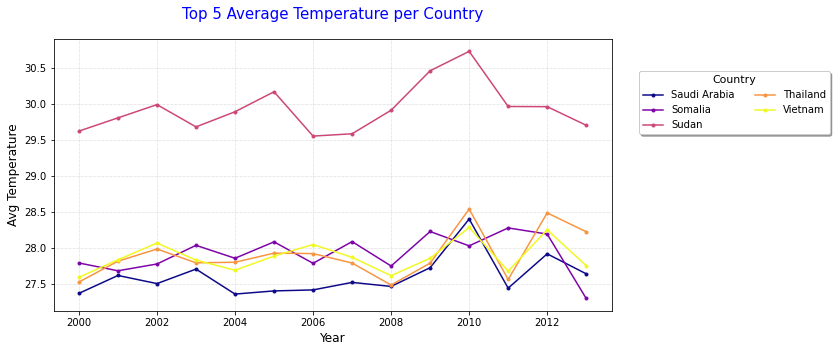

In [15]:
# Create list top 5 country by average temperatures
list_top5country = ['Sudan', 'Somalia', 'Thailand', 'Vietnam', 'Saudi Arabia']

# Subset dataframe country in list
top5country = temperatures[temperatures['country'].isin(list_top5country)]

# PLottting top 5 country
top5country.groupby(['year', 'country'])['avg_temp_c'].mean().unstack().plot(marker='.', cmap='plasma')
plt.title('Top 5 Average Temperature per Country', loc='center', pad=20, fontsize=15, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Temperature', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=2, title='Country', fontsize=10,
           title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.show()

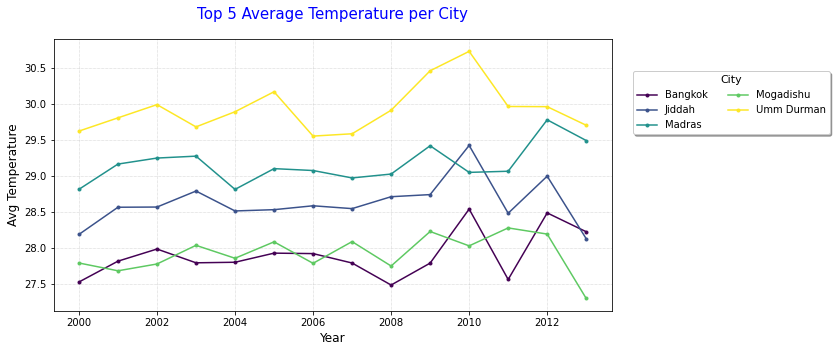

In [16]:
# Create list top 5 country by average temperatures
list_top5country = ['Umm Durman', 'Madras', 'Jiddah', 'Mogadishu', 'Bangkok']

# Subset dataframe country in list
top5country = temperatures[temperatures['city'].isin(list_top5country)]

# PLottting top 5 country
top5country.groupby(['year', 'city'])['avg_temp_c'].mean().unstack().plot(marker='.', cmap='viridis')
plt.title('Top 5 Average Temperature per City', loc='center', pad=20, fontsize=15, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Temperature', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=2, title='City', fontsize=10,
           title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.show()

In [17]:
avg_temp_ind = temperatures[temperatures['country'] == 'Indonesia']
print(avg_temp_ind)

            date      city    country  avg_temp_c  year
6765  2000-01-01   Jakarta  Indonesia      26.607  2000
6766  2000-02-01   Jakarta  Indonesia      27.060  2000
6767  2000-03-01   Jakarta  Indonesia      27.704  2000
6768  2000-04-01   Jakarta  Indonesia      27.689  2000
6769  2000-05-01   Jakarta  Indonesia      28.052  2000
...          ...       ...        ...         ...   ...
14680 2013-05-01  Surabaya  Indonesia      27.631  2013
14681 2013-06-01  Surabaya  Indonesia      27.342  2013
14682 2013-07-01  Surabaya  Indonesia      26.738  2013
14683 2013-08-01  Surabaya  Indonesia      27.113  2013
14684 2013-09-01  Surabaya  Indonesia      22.119  2013

[330 rows x 5 columns]


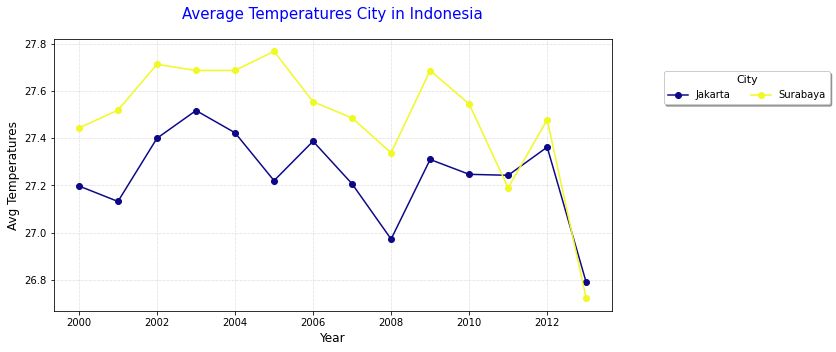

In [18]:
avg_temp_ind.groupby(['year', 'city'])['avg_temp_c'].mean().unstack().plot(marker='o', cmap='plasma')
plt.title("Average Temperatures City in Indonesia",loc='center', pad=20, fontsize=15, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Temperatures', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=2, title='City', fontsize=10,
           title_fontsize=11)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.gcf().set_size_inches(10, 5)
plt.show()

In [19]:
# Index temperatures by city
temp_country_idx = temperatures.set_index("country")

# Look at temperatures_ind
print(temp_country_idx)

                    date     city  avg_temp_c  year
country                                            
Côte D'Ivoire 2000-01-01  Abidjan      27.293  2000
Côte D'Ivoire 2000-02-01  Abidjan      27.685  2000
Côte D'Ivoire 2000-03-01  Abidjan      29.061  2000
Côte D'Ivoire 2000-04-01  Abidjan      28.162  2000
Côte D'Ivoire 2000-05-01  Abidjan      27.547  2000
...                  ...      ...         ...   ...
China         2013-05-01     Xian      18.979  2013
China         2013-06-01     Xian      23.522  2013
China         2013-07-01     Xian      25.251  2013
China         2013-08-01     Xian      24.528  2013
China         2013-09-01     Xian      22.119  2013

[16500 rows x 4 columns]


In [20]:
temp_indo = temp_country_idx.loc['Indonesia']
print(temp_indo)

                date      city  avg_temp_c  year
country                                         
Indonesia 2000-01-01   Jakarta      26.607  2000
Indonesia 2000-02-01   Jakarta      27.060  2000
Indonesia 2000-03-01   Jakarta      27.704  2000
Indonesia 2000-04-01   Jakarta      27.689  2000
Indonesia 2000-05-01   Jakarta      28.052  2000
...              ...       ...         ...   ...
Indonesia 2013-05-01  Surabaya      27.631  2013
Indonesia 2013-06-01  Surabaya      27.342  2013
Indonesia 2013-07-01  Surabaya      26.738  2013
Indonesia 2013-08-01  Surabaya      27.113  2013
Indonesia 2013-09-01  Surabaya      22.119  2013

[330 rows x 4 columns]


In [21]:
temp_jkt2012 = temp_indo[(temp_indo['city'] == 'Jakarta') & (temp_indo['year'] == 2012)]
print(temp_jkt2012)

                date     city  avg_temp_c  year
country                                        
Indonesia 2012-01-01  Jakarta      26.913  2012
Indonesia 2012-02-01  Jakarta      27.287  2012
Indonesia 2012-03-01  Jakarta      27.691  2012
Indonesia 2012-04-01  Jakarta      27.609  2012
Indonesia 2012-05-01  Jakarta      28.129  2012
Indonesia 2012-06-01  Jakarta      27.718  2012
Indonesia 2012-07-01  Jakarta      27.101  2012
Indonesia 2012-08-01  Jakarta      27.049  2012
Indonesia 2012-09-01  Jakarta      27.433  2012
Indonesia 2012-10-01  Jakarta      27.317  2012
Indonesia 2012-11-01  Jakarta      27.094  2012
Indonesia 2012-12-01  Jakarta      27.011  2012


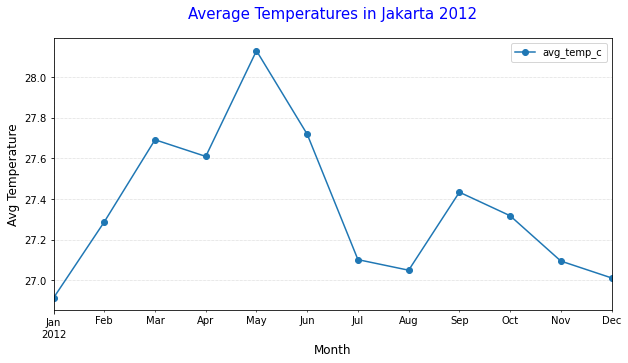

In [22]:
temp_jkt2012.plot(x='date', y='avg_temp_c', marker='o')
plt.title("Average Temperatures in Jakarta 2012", loc='center', pad=20, fontsize=15, color='blue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg Temperature', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.gcf().set_size_inches(10, 5)
plt.show()